In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap

In [23]:
df = pd.read_csv("../data/landslideCleaned.csv")

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5351 entries, 0 to 5350
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   event_id                   5351 non-null   int64  
 1   event_date                 5351 non-null   object 
 2   event_year                 5351 non-null   int64  
 3   event_month                5351 non-null   object 
 4   event_time                 5351 non-null   object 
 5   event_hour                 5351 non-null   int64  
 6   event_am_pm                5351 non-null   object 
 7   landslide_category         5351 non-null   object 
 8   landslide_trigger          5351 non-null   object 
 9   landslide_size             5351 non-null   object 
 10  landslide_setting          5351 non-null   object 
 11  fatality_count             5351 non-null   float64
 12  injury_count               5351 non-null   float64
 13  country_name               5351 non-null   objec

In [25]:
df['event_hour'] = df['event_time'].apply(lambda x: x.split(':')[0]).astype(int)

In [26]:
df['event_am_pm'] = np.where(df['event_hour'] >= 12, 'PM', 'AM')

C:\Users\deshr\AppData\Local\Temp\ipykernel_45872\3902305825.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='event_am_pm', data=df, palette='coolwarm')


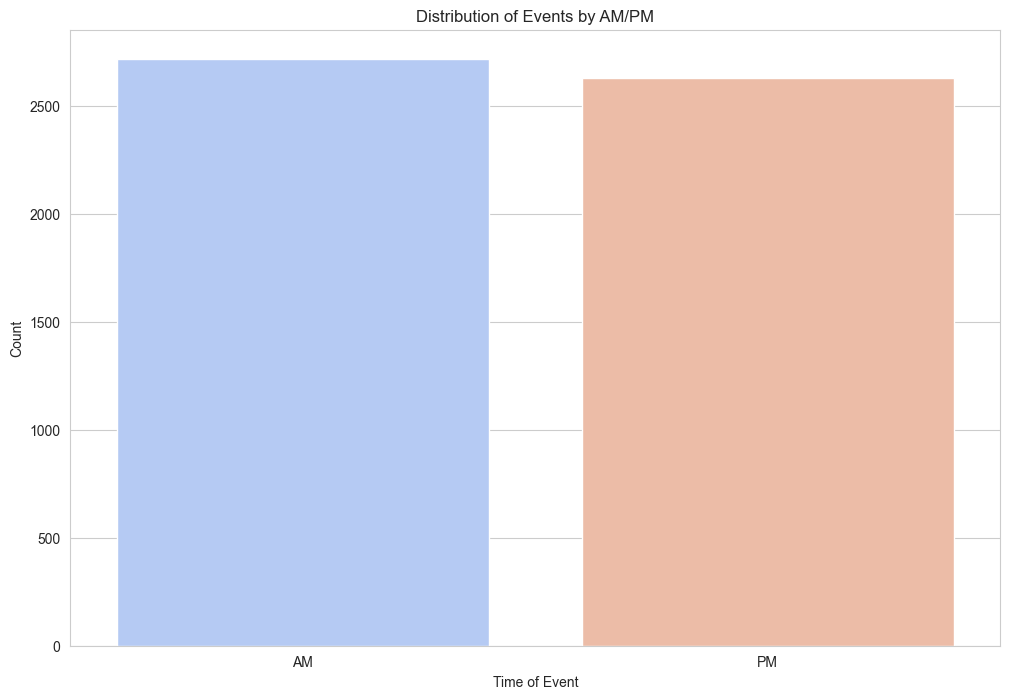

In [27]:
plt.figure(figsize=(12,8))
sns.set_style("whitegrid")


sns.countplot(x='event_am_pm', data=df, palette='coolwarm')


plt.xlabel("Time of Event")
plt.ylabel("Count")
plt.title("Distribution of Events by AM/PM")


plt.show()

In [28]:
# m = folium.Map(location=[df["latitude"].mean(), df["longitude"].mean()], zoom_start=5)

# # Add markers for each location
# for _, row in df.iterrows():
#     folium.Marker(
#         location=[row["latitude"], row["longitude"]],
#         popup=f"Location: ({row['latitude']}, {row['longitude']})",
#         icon=folium.Icon(color="blue", icon="info-sign")
#     ).add_to(m)

# # Save map as an HTML file (optional)
# m.save("event_locations_map.html")

# # Display map
# m

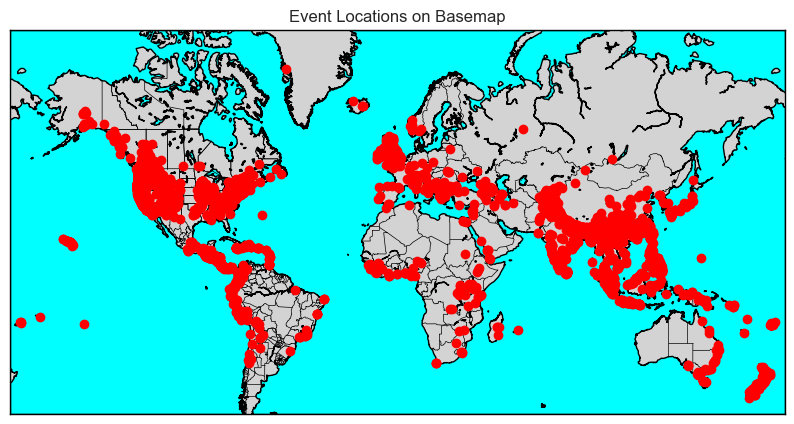

In [29]:

plt.figure(figsize=(10, 6))


m = Basemap(projection="merc", llcrnrlat=df["latitude"].min()-5, urcrnrlat=df["latitude"].max()+5,
            llcrnrlon=df["longitude"].min()-5, urcrnrlon=df["longitude"].max()+5, resolution="l")

# Draw map features
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.fillcontinents(color="lightgray", lake_color="aqua")
m.drawmapboundary(fill_color="aqua")

# Convert latitude and longitude to map coordinates
x, y = m(df["longitude"].values, df["latitude"].values)

# Plot the points
m.scatter(x, y, marker="o", color="red", zorder=5)

# Add a title
plt.title("Event Locations on Basemap")

# Show the plot
plt.show()

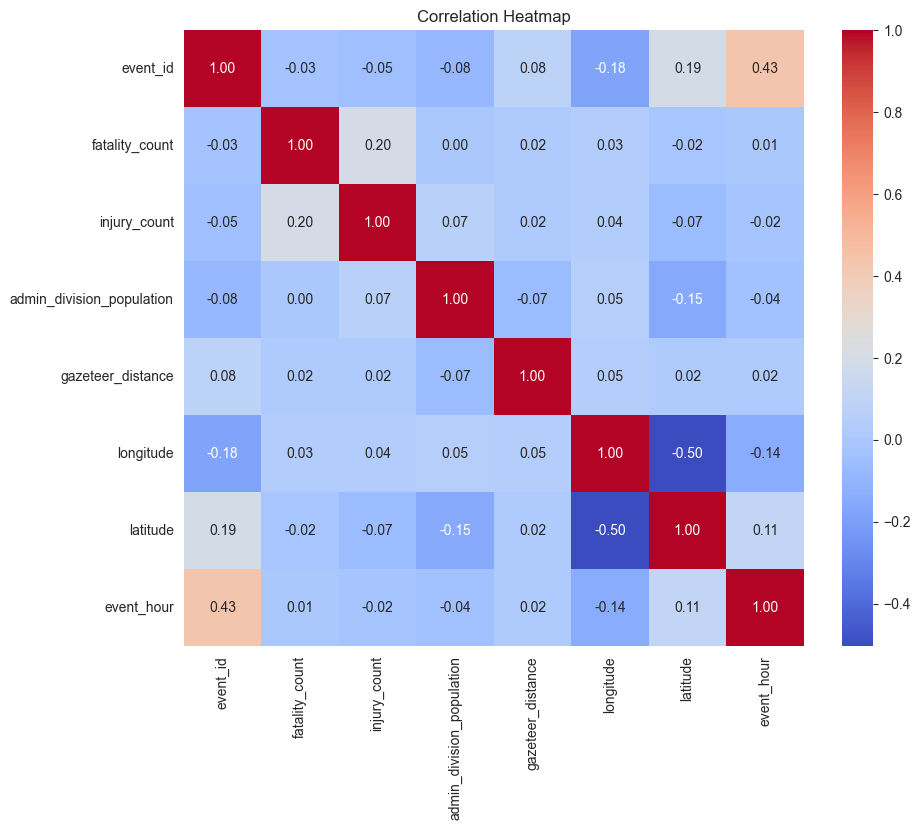

In [21]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

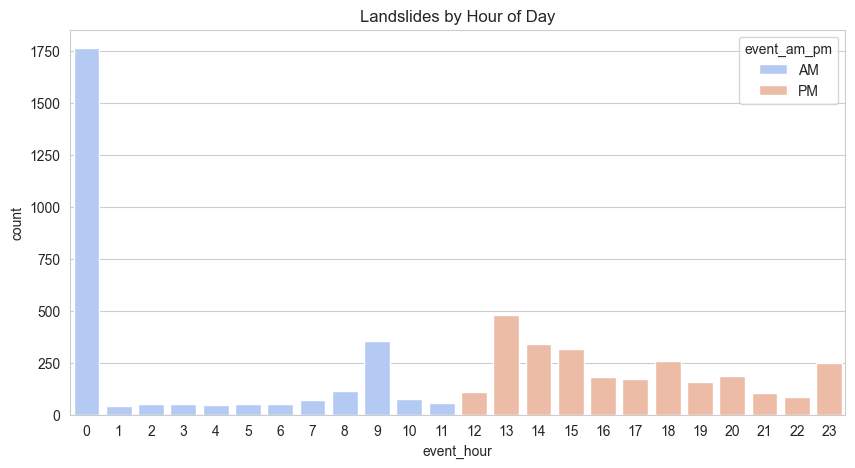

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="event_hour", hue="event_am_pm", palette="coolwarm")
plt.title("Landslides by Hour of Day")
plt.show()

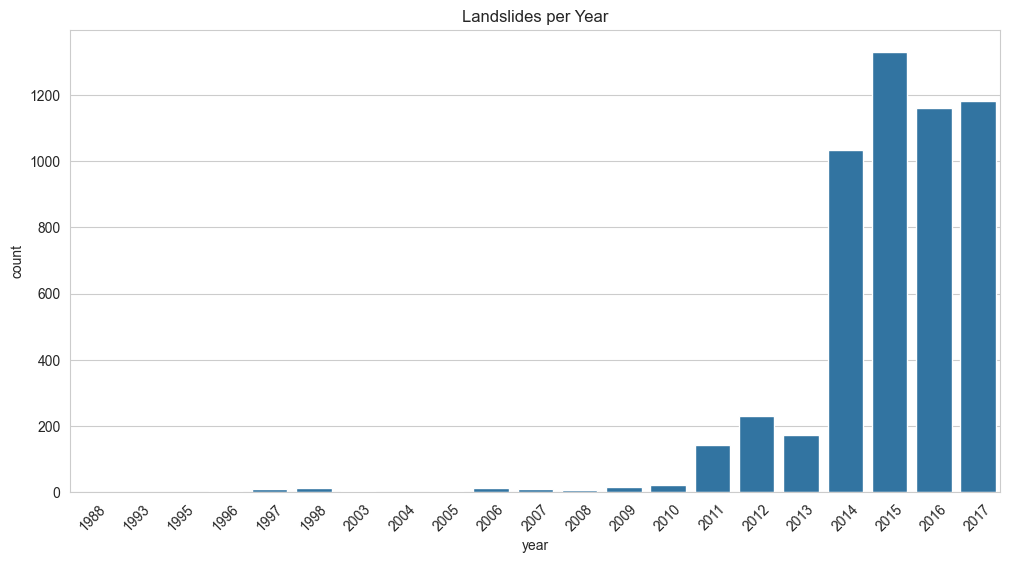

In [33]:
df["event_date"] = pd.to_datetime(df["event_date"])
df["year"] = df["event_date"].dt.year

plt.figure(figsize=(12,6))
sns.countplot(data=df, x="year", order=sorted(df["year"].unique()))
plt.xticks(rotation=45)
plt.title("Landslides per Year")
plt.show()

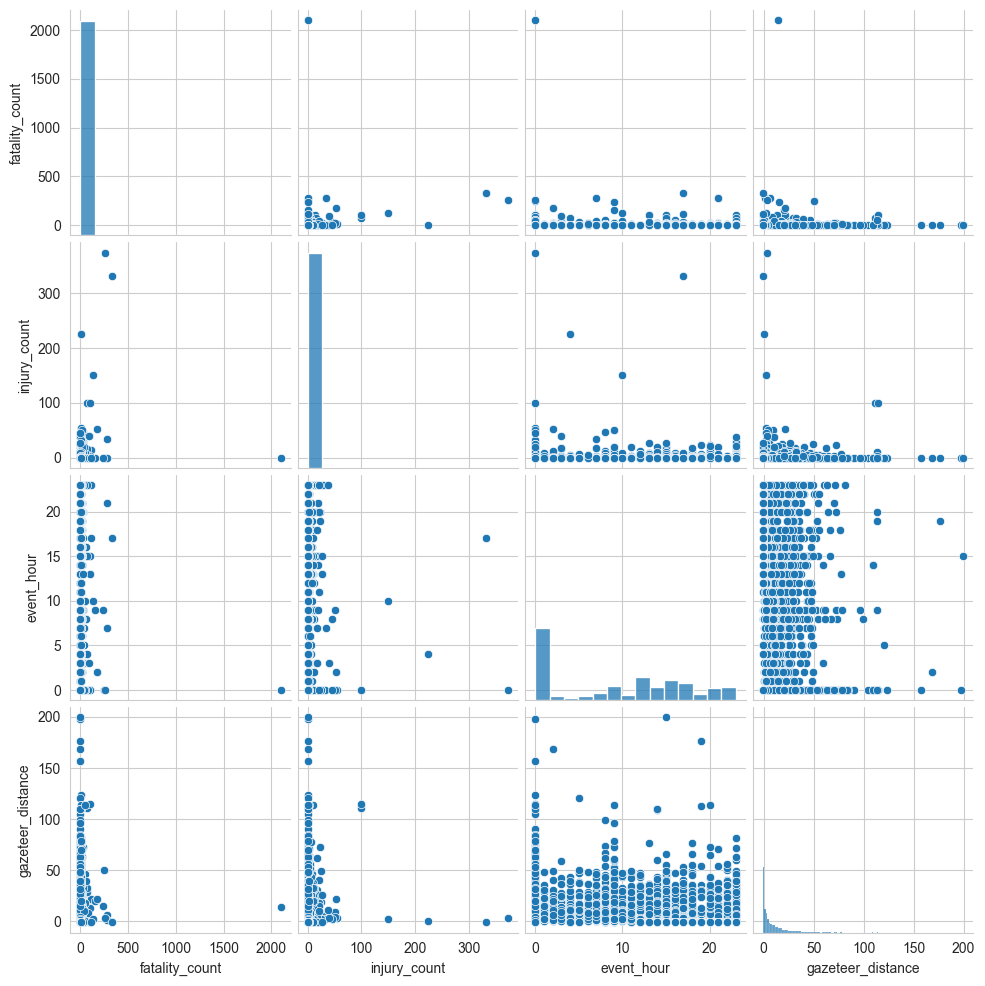

In [34]:
sns.pairplot(df[['fatality_count', 'injury_count', 'event_hour', 'gazeteer_distance']])
plt.show()

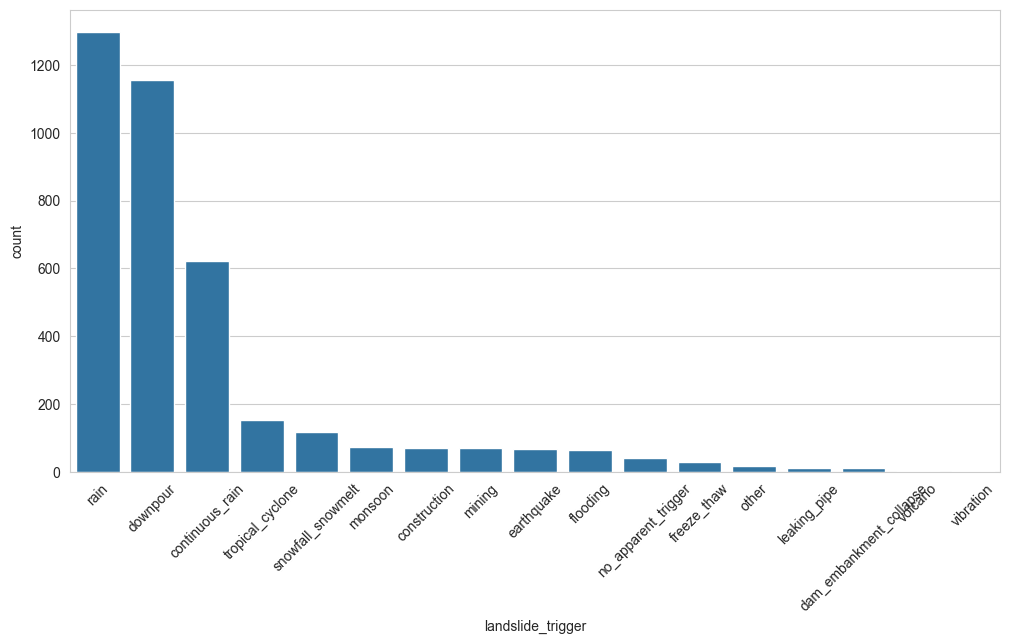

In [36]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="landslide_trigger", order=df["landslide_trigger"][df["landslide_trigger"] != 'unknown'].value_counts().index)
plt.xticks(rotation=45)
plt.show()